In [1]:
!echo "export JAVA_HOME=$(/usr/libexec/java_home)" >> ~/.bash_profile

In [2]:
!source ~/.bash_profile

In [3]:
!javac

Usage: javac <options> <source files>
where possible options include:
  @<filename>                  Read options and filenames from file
  -Akey[=value]                Options to pass to annotation processors
  --add-modules <module>(,<module>)*
        Root modules to resolve in addition to the initial modules, or all modules
        on the module path if <module> is ALL-MODULE-PATH.
  --boot-class-path <path>, -bootclasspath <path>
        Override location of bootstrap class files
  --class-path <path>, -classpath <path>, -cp <path>
        Specify where to find user class files and annotation processors
  -d <directory>               Specify where to place generated class files
  -deprecation
        Output source locations where deprecated APIs are used
  --enable-preview
        Enable preview language features. To be used in conjunction with either -source or --release.
  -encoding <encoding>         Specify character encoding used by source files
  -endorseddirs <dirs>        

In [4]:
!pip install little_mallet_wrapper

In [5]:
!pip install seaborn

In [6]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

In [7]:
!pip install little_mallet_wrapper
!pip install seaborn

In [8]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

In [9]:
#Replace filename/path
tweets_df = pd.read_csv('Desktop/Tampon_tax_Twitter/tampontax_political_cleaned.csv', delimiter=",", encoding='utf-8')

In [10]:
tweets_df.head()

,index,date,username,name,verified,type,text,retweets,in_reply_to_user.username,author.public_metrics.followers_count,likes,replies,quotes,tweet_url,media,user_bio,count
0,41,2015-10-16 02:58:14,RachelA_Adler,Rachel A. Adler,False,NaN,time government stop fining woman ovary httptcowlh3gqezuc,2,NaN,2302,3,0,0,https://twitter.com/RachelA_Adler/status/6.55e+17,No Image URL,Creates Digital Buzz 🐝 | 😷 | #EconDev | #Neurodiverse | #Activist | #LGBTQIA+ Ally🌈 She/Her/Hers...,1
1,104,2015-10-16 11:47:53,jweisswolf,Jennifer Weiss-Wolf,False,NaN,joining movement un_women,0,NaN,2984,0,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1
2,43,2015-10-16 12:01:20,jweisswolf,Jennifer Weiss-Wolf,False,NaN,gloriasteinem joannacoles danismcnally emmajune prachigu people talking let get signing,0,GloriaSteinem,2984,1,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1
3,42,2015-10-17 17:41:03,jweisswolf,Jennifer Weiss-Wolf,False,NaN,discriminatory tamponsforall,0,NaN,2984,0,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1
4,103,2015-10-17 17:41:03,jweisswolf,Jennifer Weiss-Wolf,False,NaN,discriminatory tamponsforall,0,NaN,2984,0,0,0,https://twitter.com/jweisswolf/status/6.55e+17,No Image URL,"vp & fellow @brennancenter, founder @PeriodEquity, writer activist feminist forging U.S. menstru...",1


In [11]:
tweets_df['text'] = tweets_df['text'].astype(str)

In [12]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in tweets_df['text']]

In [13]:
original_tweets = [title for title in tweets_df['text']]

In [14]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 236
Mean Number of Words per Document: 8.6
Vocabulary Size: 882


In [15]:
num_topics = 35

In [16]:
training_data = training_data

In [17]:
#Change to your desired output directory
output_directory_path = 'Desktop/topic-model-output/Twitter/Tampon_tax_political_processed'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [18]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

Importing data...
Complete
Training topic model...
Complete


([['home',
   'fighting',
   'ebxao',
   'httpstcoctrx',
   'fight',
   'lwv',
   'httpstcom',
   'nbza',
   'httpstcopjjte',
   'californiaforall',
   'revise',
   'may',
   'release',
   'ahead',
   'cawomenscaucus',
   'jensiebelnewsom',
   'alongside',
   'announcement',
   'budget',
   'major'],
  ['state',
   'tampon',
   'bill',
   'taxed',
   'would',
   'year',
   'httpstco',
   'klsp',
   'isnt',
   'candy',
   'httpstcokxwbu',
   'seed',
   'sunflower',
   'bbq',
   'mzs',
   'httpstcop',
   'working',
   'intro',
   'michigan',
   'via'],
  ['calling',
   'thank',
   'httpstcohamxscccie',
   'whyimarch',
   'womensmarch',
   'ashleyjudd',
   'menstrualequity',
   'american',
   'urvvejv',
   'httpstcocy',
   'reached',
   'weve',
   'signature',
   'via',
   'glad',
   'essay',
   'maximhy',
   'kathapollitt',
   'fight',
   'msmagazine'],
  ['pls',
   'httpstcoalvg',
   'zoereport',
   'huffpostwomen',
   'lhei',
   'httpstcowr',
   'shared',
   'ingridnilsen',
   'potus',

In [19]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['home', 'fighting', 'ebxao', 'httpstcoctrx', 'fight', 'lwv', 'httpstcom', 'nbza', 'httpstcopjjte', 'californiaforall', 'revise', 'may', 'release', 'ahead', 'cawomenscaucus', 'jensiebelnewsom', 'alongside', 'announcement', 'budget', 'major']

✨Topic 1✨

['state', 'tampon', 'bill', 'taxed', 'would', 'year', 'httpstco', 'klsp', 'isnt', 'candy', 'httpstcokxwbu', 'seed', 'sunflower', 'bbq', 'mzs', 'httpstcop', 'working', 'intro', 'michigan', 'via']

✨Topic 2✨

['calling', 'thank', 'httpstcohamxscccie', 'whyimarch', 'womensmarch', 'ashleyjudd', 'menstrualequity', 'american', 'urvvejv', 'httpstcocy', 'reached', 'weve', 'signature', 'via', 'glad', 'essay', 'maximhy', 'kathapollitt', 'fight', 'msmagazine']

✨Topic 3✨

['pls', 'httpstcoalvg', 'zoereport', 'huffpostwomen', 'lhei', 'httpstcowr', 'shared', 'ingridnilsen', 'potus', 'thisisfusion', 'tarynhillin', 'kdpt', 'httpstcojkdp', 'markruffalo', 'smrtgrls', 'stephhallett', 'morganized', 'linked', 'discus', 'saradignan']

✨Topic 4✨



In [20]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [21]:
tweet_dict = dict(zip(training_data, original_tweets))

In [22]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

In [23]:
display_top_tweets_per_topic(topic_number=1, number_of_documents=5)

✨Topic 1✨

['state', 'tampon', 'bill', 'taxed', 'would', 'year', 'httpstco', 'klsp', 'isnt', 'candy', 'httpstcokxwbu', 'seed', 'sunflower', 'bbq', 'mzs', 'httpstcop', 'working', 'intro', 'michigan', 'via']

0.9952 good news nevada voted abolish tampon tax making 10th state hopeful others follow distant future httpstco9xpsdoyhyj

0.9905 taxed state bbq sunflower seed tampon httpstcokxwbu4aq1p via

0.9905 taxed state bbq sunflower seed tampon httpstcokxwbu4aq1p via

0.9905 michigan 4th state intro bill 52k working would httpstcop7j2mzs6uz

0.9905 michigan 4th state intro bill 52k working would httpstcop7j2mzs6uz



In [24]:
display_top_tweets_per_topic(topic_number=8, number_of_documents=5)

✨Topic 8✨

['asmgarcia', 'chang', 'asml', 'bill', 'jerrybrowngov', 'work', 'amazing', 'httpstcofwhazrwn', 'colleague', 'govmikedewine', 'brigidekelly', 'stand', 'httpstcoydjctah', 'menstrualequity', 'axed', 'take', 'watching', 'world', 'httpstcooxlrvjl', 'vlamers']

0.9915 httpstcormibttzoeu amazing work asmgarcia asml2chang next stop jerrybrowngov

0.9915 govmikedewine signed bill axed oh amazing work brigidekelly colleague httpstcofwhazrwn6h

0.9915 govmikedewine signed bill axed oh amazing work brigidekelly colleague httpstcofwhazrwn6h

0.9904 httpstcoydjctah2ol jerrybrowngov bill stand menstrualequity asmgarcia asml2chang

0.9904 httpstcoydjctah2ol jerrybrowngov bill stand menstrualequity asmgarcia asml2chang



In [25]:
display_top_tweets_per_topic(topic_number=7, number_of_documents=5)

✨Topic 7✨

['product', 'tax', 'would', 'ohio', 'hygiene', 'feminine', 'senate', 'vote', 'bill', 'house', 'voted', 'taxexempt', 'denver', 'arent', 'necessary', 'medically', 'deemed', 'proposed', 'orynx', 'httpstcopad']

0.9964 va house bill24 would away 6 tax female hygiene product va advanced first time amp heading entire finance committee bipartisan vote 71 hearing delegate voted cosponsor tonight 5amp6

0.9948 new york senate voted kill tax feminine hygiene product feb wrote movement would big httpstcolcvflnmmvv

0.9935 ca gov jerry brown vetoed bill yesterday would gotten rid tax menstrual product

0.9922 official sale use tax feminine hygiene product denver vote 110 taxexempt

0.9902 ohio house vote ohio senate go along httpstcopad7orynx2



In [26]:
display_top_tweets_per_topic(topic_number=14, number_of_documents=5)

✨Topic 14✨

['like', 'seattle', 'representative', 'washingtonstate', 'repealed', 'see', 'youd', 'contact', 'advocacy', 'included', 'touch', 'number', 'gotten', 'youve', 'look', 'juliemastrine', 'great', 'support']

0.9921 juliemastrine look like youve gotten great number touch included advocacy

0.9912 youd like see repealed support sb 6629 washingtonstate contact representative seattle

0.0003 womansday httpstcojf6o6gb1wv

0.0003 theaffinitymag pls

0.0003 miafarrow nytimes



In [27]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

In [28]:
display_bolded_topic_words_in_context(topic_number=1, number_of_documents=4)

✨Topic 1✨

['state', 'tampon', 'bill', 'taxed', 'would', 'year', 'httpstco', 'klsp', 'isnt', 'candy', 'httpstcokxwbu', 'seed', 'sunflower', 'bbq', 'mzs', 'httpstcop', 'working', 'intro', 'michigan', 'via']



✨✨✨

**0.9952207190361662**

good news nevada voted abolish **TAMPON** tax making 10th **STATE** hopeful others follow distant future httpstco9xpsdoyhyj

✨✨✨

**0.9904891247116436**

**TAXED** **STATE** **BBQ** **SUNFLOWER** **SEED** **TAMPON** httpstcokxwbu4aq1p **VIA**

✨✨✨

**0.9904891247116436**

**TAXED** **STATE** **BBQ** **SUNFLOWER** **SEED** **TAMPON** httpstcokxwbu4aq1p **VIA**

✨✨✨

**0.9904891247116436**

**MICHIGAN** 4th **STATE** **INTRO** **BILL** 52k **WORKING** **WOULD** httpstcop7j2mzs6uz

In [29]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [30]:
tweets_df['topic_distributions'] = pd.Series(topic_distributions)

In [31]:
topic_distributions_df = tweets_df['topic_distributions'].apply(pd.Series)

In [32]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

In [33]:
tweets_df = pd.concat([tweets_df, topic_distributions_df], axis=1)

In [34]:
tweets_df.columns

Index(['index', 'date', 'username', 'name', 'verified', 'type', 'text',
       'retweets', 'in_reply_to_user.username',
       'author.public_metrics.followers_count', 'likes', 'replies', 'quotes',
       'tweet_url', 'media', 'user_bio', 'count', 'topic_distributions',
       'home fighting ebxao httpstcoctrx', 'state tampon bill taxed',
       'calling thank httpstcohamxscccie whyimarch',
       'pls httpstcoalvg zoereport huffpostwomen',
       'httpstco via woman kdqxdazck', 'woman stop fund jwemxu',
       'legislator ncall call notaluxury', 'product tax would ohio',
       'asmgarcia chang asml bill',
       'tamponsforall state httpstcoaettcmhtuz msmagazine',
       'ypd fxd httpstcoea need', 'help word spread jamiedecarlo',
       'rule dnak httpstcou nightlyshow', 'tampon jerrybrowngov sale tart',
       'like seattle representative washingtonstate',
       'article great governing shout', 'jweisswolf iuqwyb httpstcok advocacy',
       'bipartisan flgovscott year signed',
    

In [35]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

In [36]:
#tweets_df.rename(columns={'created_at': 'date','public_metrics.retweet_count': 'retweets', 
                          #'author.username': 'username', 
                          #'author.name': 'name',
                          #'author.verified': 'verified', 
                          #'public_metrics.like_count': 'likes', 
                          #'public_metrics.quote_count': 'quotes', 
                          #'public_metrics.reply_count': 'replies',
                           #'author.description': 'user_bio'},
                           # inplace=True)

In [37]:
tweets_df['year'] = pd.to_datetime(tweets_df['date'].dt.year, format='%Y')

In [38]:
tweets_df['year-month'] = tweets_df['date'].dt.to_period('M')

In [39]:
tweets_df['Date (by month)'] = [month.to_timestamp() for month in tweets_df['year-month']]

In [40]:
tweets_df = tweets_df.set_index('Date (by month)')

<AxesSubplot:title={'center':'Tampon Tax Political Tweets By Topic: \nYpd Fxd Httpstcoea Need'}, xlabel='Date (by month)'>

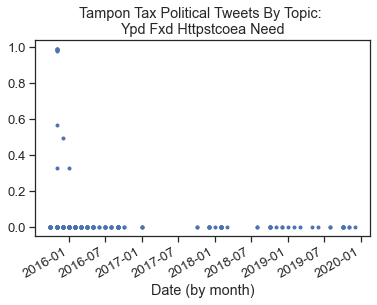

In [41]:
#change title
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

tweets_df[topic_label].plot(style='.', title=f'Tampon Tax Political Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nAsmgarcia Chang Asml Bill'}, xlabel='Date (by month)'>

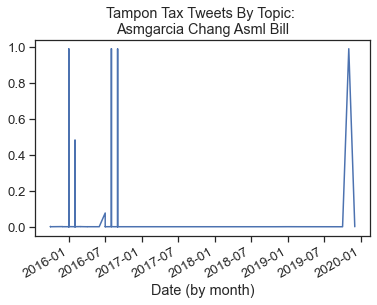

In [42]:
#change title

topic_number = 8

topic_label = " ".join(topics[topic_number][:4])

tweets_df[topic_label].plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nAsmgarcia Chang Asml Bill'}, xlabel='Date (by month)'>

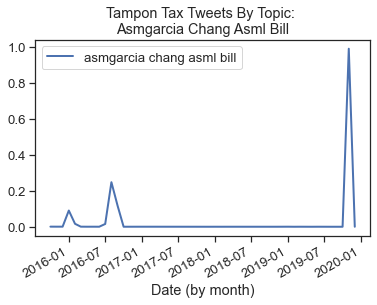

In [43]:
#change title

topic_number = 8

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nLike Seattle Representative Washingtonstate'}, xlabel='Date (by month)'>

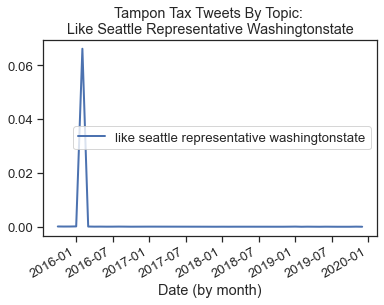

In [44]:
#change title

topic_number = 14

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nHome Fighting Ebxao Httpstcoctrx'}, xlabel='Date (by month)'>

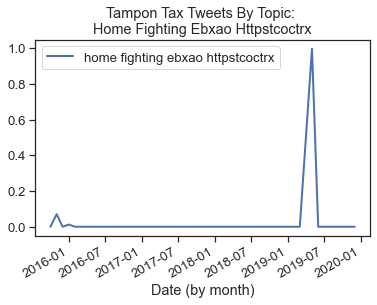

In [45]:
#change title & topic number

topic_number = 0

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

In [46]:
display_top_tweets_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['home', 'fighting', 'ebxao', 'httpstcoctrx', 'fight', 'lwv', 'httpstcom', 'nbza', 'httpstcopjjte', 'californiaforall', 'revise', 'may', 'release', 'ahead', 'cawomenscaucus', 'jensiebelnewsom', 'alongside', 'announcement', 'budget', 'major']

0.9967 watch live governor gavinnewsom make major budget announcement 1215 pm today alongside first partner jensiebelnewsom member cawomenscaucus ahead release may revise californiaforall nn httpstcopjjte2nbza httpstcom2lwv369ve

0.9844 httpstcoctrx3ebxao fighting fight uk home

0.9844 httpstcoctrx3ebxao fighting fight uk home

0.6496 naral barackobama mashable

0.0006 womansday httpstcojf6o6gb1wv



<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nYpd Fxd Httpstcoea Need'}, xlabel='Date (by month)'>

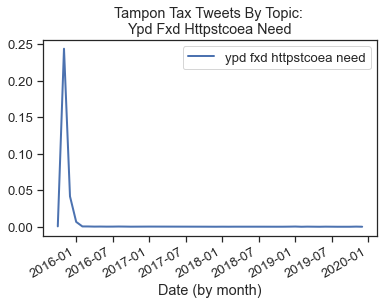

In [47]:
#change title & topic number

topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)